 # Data Dictionary

In [1]:
# id (Unique id for each patient)
# age (Age of the patient in years)
# origin (place of study)
# sex (Male/Female)
# cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
# trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
# chol (serum cholesterol in mg/dl)
# fbs (if fasting blood sugar > 120 mg/dl)
# restecg (resting electrocardiographic results)
# -- Values: [normal, stt abnormality, lv hypertrophy]
# thalach: maximum heart rate achieved
# exang: exercise-induced angina (True/ False)
# oldpeak: ST depression induced by exercise relative to rest
# slope: the slope of the peak exercise ST segment
# ca: number of major vessels (0-3) colored by fluoroscopy
# thal: [normal; fixed defect; reversible defect]
# num: the predicted attribute

 # Predicting Stroke Data

In [2]:
# Importing all the tools we need

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For sklearn, referred the documentation "https://scikit-learn.org/1.5/machine_learning_map.html"
import sklearn 
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from imblearn.over_sampling import SMOTE

## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
# from sklearn.metrics import plot_roc_curve # note: this was changed in Scikit-Learn 1.2+ to be "RocCurveDisplay" (see below)
from sklearn.metrics import RocCurveDisplay # new in Scikit-Learn 1.2+

## Load Data

In [3]:
df = pd.read_csv('data/healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## Data Exploration (Exploratory Data Analysis or EDA)

In [4]:
df["stroke"].value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

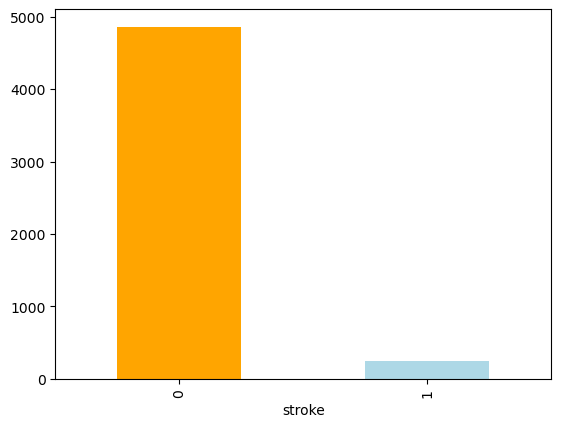

In [5]:
df["stroke"].value_counts().plot(kind="bar", color=['orange', 'lightblue']);

In [6]:
df.drop(columns=['id'],
        inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [7]:
# Missing values
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [8]:
# For now, Dropping the missing value columns

df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4909 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4909 non-null   object 
 1   age                4909 non-null   float64
 2   hypertension       4909 non-null   int64  
 3   heart_disease      4909 non-null   int64  
 4   ever_married       4909 non-null   object 
 5   work_type          4909 non-null   object 
 6   Residence_type     4909 non-null   object 
 7   avg_glucose_level  4909 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     4909 non-null   object 
 10  stroke             4909 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 460.2+ KB


In [9]:
# Comparing different columns to each other
df['age'].value_counts()

age
78.00    93
57.00    93
52.00    85
54.00    84
55.00    83
         ..
1.40      3
0.16      3
0.40      2
0.08      2
0.48      2
Name: count, Length: 104, dtype: int64

In [10]:
pd.crosstab(df.stroke, df.age)

age,0.08,0.16,0.24,0.32,0.40,0.48,0.56,0.64,0.72,0.80,...,73.00,74.00,75.00,76.00,77.00,78.00,79.00,80.00,81.00,82.00
stroke,,,,,,,,,,,,,,,,,,,,,
0,2,3,5,5,2,2,5,4,5,4,...,38,31,45,37,30,77,64,51,46,46
1,0,0,0,0,0,0,0,0,0,0,...,4,7,3,5,7,16,13,16,14,9


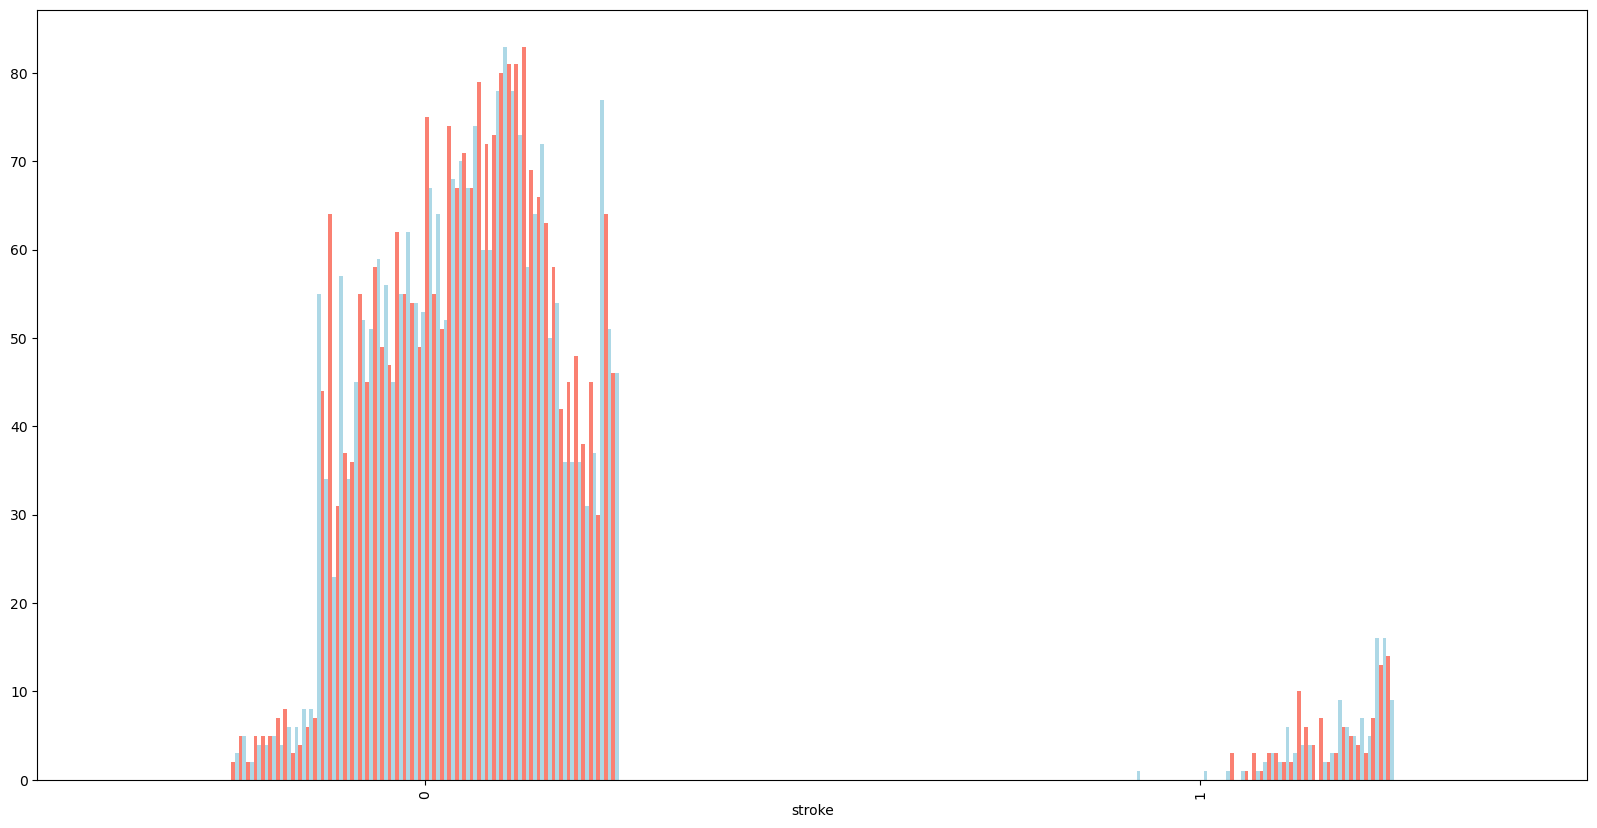

In [11]:
## Comparing 'age' with 'stroke'

pd.crosstab(df.stroke, df.age).plot(kind='bar', 
                                    figsize=(20, 10),
                                    color=['salmon', 'lightblue'], 
                                    legend=None
                                   );
# The below plot is not so useful

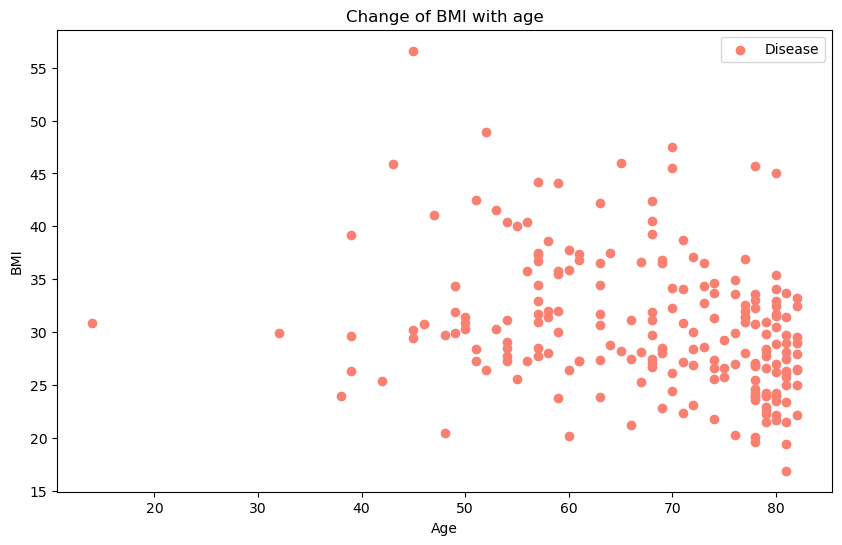

In [12]:
# PLotting the scatter plot
# Comparing bmi and age of people that get stroke
plt.figure(figsize=(10,6))
plt.scatter(df.age[df.stroke==1], df.bmi[df.stroke==1], c='salmon');

plt.title('Change of BMI with age')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.legend(['Disease']);

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4909 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4909 non-null   object 
 1   age                4909 non-null   float64
 2   hypertension       4909 non-null   int64  
 3   heart_disease      4909 non-null   int64  
 4   ever_married       4909 non-null   object 
 5   work_type          4909 non-null   object 
 6   Residence_type     4909 non-null   object 
 7   avg_glucose_level  4909 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     4909 non-null   object 
 10  stroke             4909 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 460.2+ KB


For example, if you have a Brand column with three possible values (Nike, Adidas, Puma), one-hot encoding would produce three columns:
Brand_Nike
Brand_Adidas
Brand_Puma

However, knowing the values of two of these columns automatically gives you the value of the third one. For instance:

If Brand_Nike=0 and Brand_Adidas=0, then it must be Brand_Puma=1.
This redundancy can cause multicollinearity, where one column can be perfectly predicted by the others. In linear models, this can lead to issues like unreliable coefficient estimates, though it's less of a problem for tree-based models like Random Forests.


In [14]:
# Data Transformation

categorical_columns = df.select_dtypes(include='object').columns.tolist()
transformed_data = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
transformed_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4909 entries, 0 to 5109
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             4909 non-null   float64
 1   hypertension                    4909 non-null   int64  
 2   heart_disease                   4909 non-null   int64  
 3   avg_glucose_level               4909 non-null   float64
 4   bmi                             4909 non-null   float64
 5   stroke                          4909 non-null   int64  
 6   gender_Male                     4909 non-null   bool   
 7   gender_Other                    4909 non-null   bool   
 8   ever_married_Yes                4909 non-null   bool   
 9   work_type_Never_worked          4909 non-null   bool   
 10  work_type_Private               4909 non-null   bool   
 11  work_type_Self-employed         4909 non-null   bool   
 12  work_type_children              4909 no

## Building correlation matrix

* Correlation matrix -> Tells how much the independent variables are related to each other

In [15]:
transformed_data.corr()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
age,1.000000,0.274425,0.257123,0.235838,0.333398,0.232331,-0.030149,-0.010674,0.680782,-0.079384,0.120021,0.327347,-0.634937,0.010948,0.242404,0.124377,0.076801
hypertension,0.274425,1.000000,0.115991,0.180543,0.167811,0.142515,0.021863,-0.004540,0.162406,-0.021341,-0.004637,0.111794,-0.126561,-0.001074,0.062078,0.066717,0.028214
heart_disease,0.257123,0.115991,1.000000,0.154525,0.041357,0.137938,0.082983,-0.003257,0.111245,-0.015312,-0.000279,0.081484,-0.088072,-0.002362,0.071339,-0.020685,0.048686
avg_glucose_level,0.235838,0.180543,0.154525,1.000000,0.175502,0.138936,0.053008,0.012219,0.151377,-0.013991,0.009273,0.069051,-0.101182,-0.007617,0.074250,0.032085,0.010981
bmi,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374,-0.026020,-0.011802,0.341695,-0.028602,0.208029,0.072701,-0.448674,-0.000122,0.107031,0.107964,0.088324
stroke,0.232331,0.142515,0.137938,0.138936,0.042374,1.000000,0.006939,-0.003010,0.105089,-0.014149,0.014934,0.055356,-0.080971,0.006031,0.057320,0.010723,0.021530
gender_Male,-0.030149,0.021863,0.082983,0.053008,-0.026020,0.006939,1.000000,-0.011891,-0.036138,0.012326,-0.038972,-0.022134,0.091791,-0.004178,0.038681,-0.093736,0.011694
gender_Other,-0.010674,-0.004540,-0.003257,0.012219,-0.011802,-0.003010,-0.011891,1.000000,-0.019567,-0.000958,0.012332,-0.006180,-0.005680,-0.014482,0.031484,-0.011110,-0.005999
ever_married_Yes,0.680782,0.162406,0.111245,0.151377,0.341695,0.105089,-0.036138,-0.019567,1.000000,-0.091976,0.156818,0.191469,-0.545462,0.004989,0.176007,0.105253,0.106574
work_type_Never_worked,-0.079384,-0.021341,-0.015312,-0.013991,-0.028602,-0.014149,0.012326,-0.000958,-0.091976,1.000000,-0.077664,-0.029051,-0.026698,0.023430,-0.030419,0.035866,-0.028200


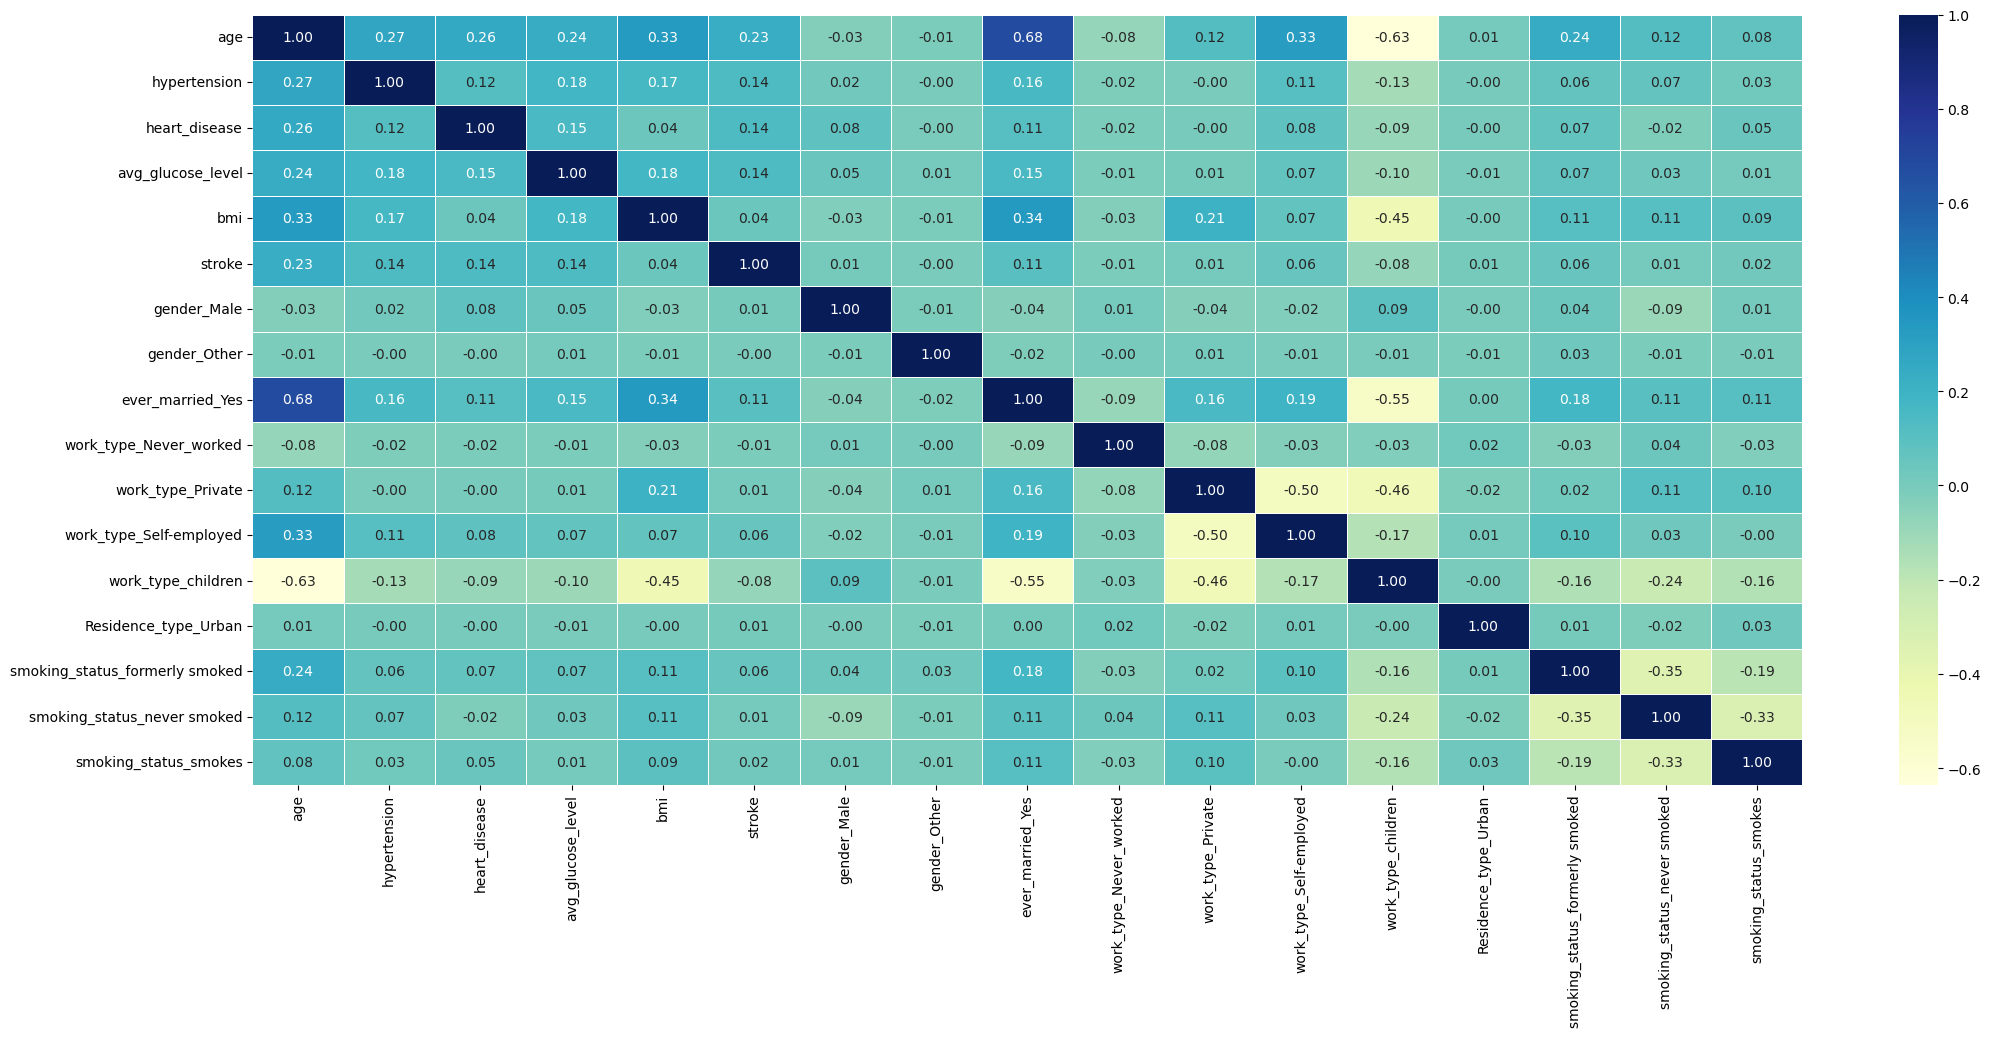

In [16]:
# Making the correlation matrix visual

corr_matrix = transformed_data.corr()
fig, ax = plt.subplots(figsize=(25, 10))

# Using seaborn's heatmap
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt="0.2f",
                 cmap="YlGnBu" # yellow green blue
                )

# Performing model-driven EDA



## Modelling - Building machine learning models

* Trying to achieve above 95% accuracy

In [17]:
transformed_data.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,True,False,True,False,True,False,False,True,True,False,False
2,80.0,0,1,105.92,32.5,1,True,False,True,False,True,False,False,False,False,True,False
3,49.0,0,0,171.23,34.4,1,False,False,True,False,True,False,False,True,False,False,True
4,79.0,1,0,174.12,24.0,1,False,False,True,False,False,True,False,False,False,True,False
5,81.0,0,0,186.21,29.0,1,True,False,True,False,True,False,False,True,True,False,False


In [18]:
# Split the data into X and y

X = transformed_data.drop('stroke', axis=1)
y = transformed_data['stroke']

np.random.seed(42) # So theat we can reproduce our results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [19]:
X_train

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
3565,40.0,0,0,65.77,31.2,False,False,True,False,True,False,False,True,False,True,False
898,59.0,0,0,81.64,32.8,False,False,True,False,False,True,False,True,False,False,False
2707,57.0,0,0,217.40,36.6,False,False,True,False,True,False,False,True,False,True,False
4198,81.0,0,0,71.18,23.9,True,False,True,False,False,True,False,True,True,False,False
2746,65.0,0,0,95.88,28.5,True,False,True,False,False,True,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4613,19.0,0,0,89.30,22.1,False,False,False,False,True,False,False,True,False,True,False
511,51.0,0,0,82.93,29.7,False,False,True,False,True,False,False,False,False,False,True
3247,53.0,0,0,90.65,22.1,False,False,True,False,True,False,False,False,True,False,False
3946,11.0,0,0,93.51,20.8,False,False,False,False,False,False,True,False,False,False,False


Trying the below macine learning models
* Linear SVC
* Logistic Regression
* KNN Classifier
* Random Forest Classifier

In [20]:
# Putting models in a dictionary
models = {
    "Linear SVC": LinearSVC(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier()
}

# Fitting and scoring models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    model_scores = {} # Dict to store the model scores

    for name, model in models.items():
        model.fit(X_train, y_train)
        # model_scores[name] = model.score(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)

    return model_scores

In [21]:
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)
model_scores

{'Linear SVC': 0.9460285132382892,
 'Logistic Regression': 0.9460285132382892,
 'KNN': 0.9378818737270875,
 'Random Forest': 0.9460285132382892}

In [22]:
# model_comparision
model_compare = pd.DataFrame(model_scores, index=['Accuracy'])
model_compare

,Linear SVC,Logistic Regression,KNN,Random Forest
Accuracy,0.946029,0.946029,0.937882,0.946029


In [23]:
model_compare.T

,Accuracy
Linear SVC,0.946029
Logistic Regression,0.946029
KNN,0.937882
Random Forest,0.946029


<Axes: >

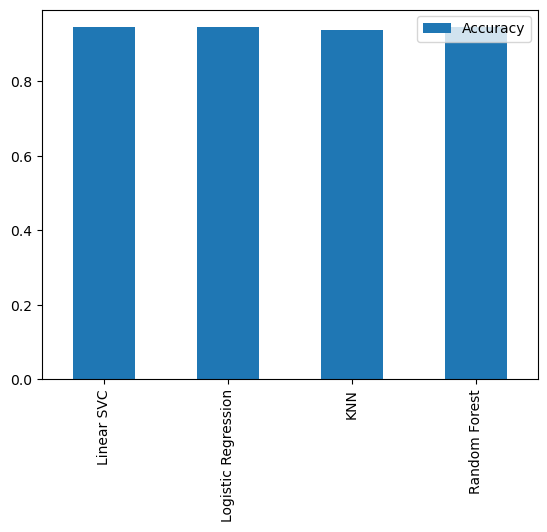

In [24]:
model_compare.T.plot.bar()

The following is to be taken care of:
* Hyperparameter tuning
* Feature importance
* Confusion matrix
* Cross—validation
* Precision
* Recall
* Fl score
* Classification report
* ROC curve
* Area under the curve (AUC)

## Hyperparameter tuning

In [25]:
# Tuning KNN - Experimentation
train_scores = []
test_scores = []

# Create a list of diff neighbours for n_neighbors which is by default 5
neighbours = range(1, 21)

knn = KNeighborsClassifier()
for i in neighbours:
    knn.set_params(n_neighbors=i)
    
    # Fit the model
    knn.fit(X_train, y_train)

    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

In [26]:
train_scores

[1.0,
 0.9646040234275528,
 0.9651133180544945,
 0.9607843137254902,
 0.9602750190985485,
 0.9600203717850777,
 0.9592564298446652,
 0.9600203717850777,
 0.9600203717850777,
 0.9600203717850777,
 0.9597657244716068,
 0.9600203717850777,
 0.959511077158136,
 0.9602750190985485,
 0.9602750190985485,
 0.9602750190985485,
 0.9602750190985485,
 0.9602750190985485,
 0.9602750190985485,
 0.9602750190985485]

In [27]:
test_scores

[0.9073319755600815,
 0.9419551934826884,
 0.9327902240325866,
 0.9429735234215886,
 0.9378818737270875,
 0.945010183299389,
 0.945010183299389,
 0.9460285132382892,
 0.9460285132382892,
 0.9460285132382892,
 0.9460285132382892,
 0.9460285132382892,
 0.9460285132382892,
 0.9460285132382892,
 0.9460285132382892,
 0.9460285132382892,
 0.9460285132382892,
 0.9460285132382892,
 0.9460285132382892,
 0.9460285132382892]

Maximum KNN score on the test data: 94.60%


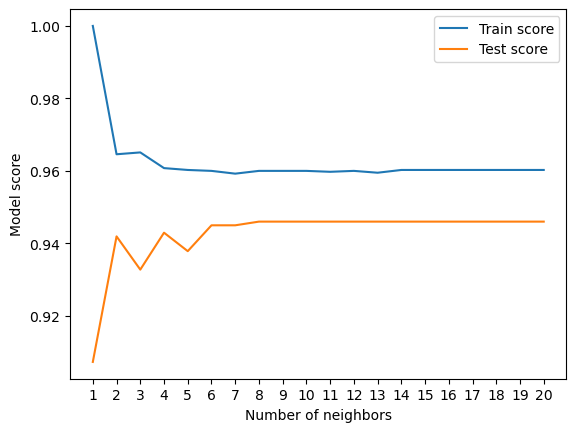

In [28]:
plt.plot (neighbours, train_scores, label="Train score")
plt.plot(neighbours, test_scores, label="Test score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel ("Model score")
plt.legend()
print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

### Hyperparamter tuning (Using RandomisedSearchCV)

CV = Cross-validation

In [29]:
# Tuning logistic regression
# Creating a hyperparameter grid for Logistic Regression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
               "solver": ["liblinear"]}
# np.logspace(-4, 4, 20)

# Creating a hyperparameter grid for RandomForestClassifier
# n_estimators -> how many trees we have in the forest
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
          "max_depth": [None, 3, 5, 10],
          "min_samples_split": np.arange(2, 20, 2),
          "min_samples_leaf": np.arange(1, 20, 2)}


### Now, using the hyperparameters grid of each model to tune the RandomisedSearchCV

* RandomisedSearchCV helps in cross-validation split

In [30]:
# Tuning logistic Regression
np.random.seed(42)

# RandomSearch logistic regression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions=log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)

rs_log_reg.fit(X_train, y_train)                                

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [31]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 1.623776739188721}

In [32]:
rs_log_reg.score(X_test, y_test)

0.9460285132382892

In [33]:
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

rs_rf.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [34]:
rs_rf.best_params_

{'n_estimators': 60,
 'min_samples_split': 18,
 'min_samples_leaf': 1,
 'max_depth': None}

In [35]:
rs_rf.score(X_test, y_test)

0.9460285132382892

# Using GridSearchCV
* Exhaustive search over specified parameter values for an estimator.

In [36]:
# Hyperparameter Tuning of LogisticRegression using GridSearchCV

# Different hyperparameters for our LogisticRegression model
log_reg_grid = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"]}

gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid, # only difference
                          cv=5,
                          verbose=True)

# No n_iter, as GridSearchCV tries every possible combinations and returns the best one

gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [37]:
gs_log_reg.best_params_

{'C': 1.3738237958832638, 'solver': 'liblinear'}

In [38]:
gs_log_reg.score(X_test, y_test)

0.9460285132382892

# Evaluating the model
* Evaluating out best tuned machine learning model

In [39]:
y_preds = gs_log_reg.predict(X_test)
# list(y_preds).count(1)
y_preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [40]:
# y_preds = gs_log_reg.predict(X_train)
# list(y_train).count(0)

## Confusion Matrix

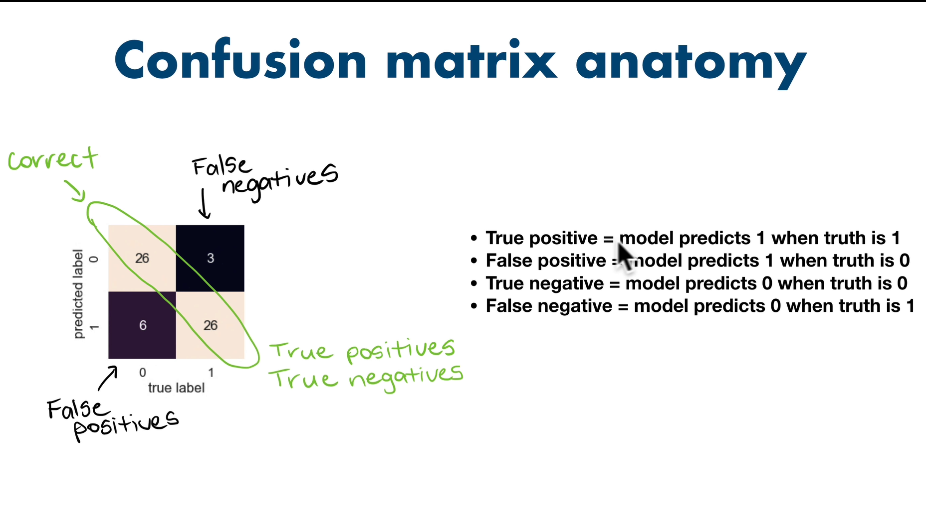


In [41]:
# Confusion matrix
confusion_matrix(y_test, y_preds)

array([[929,   0],
       [ 53,   0]], dtype=int64)

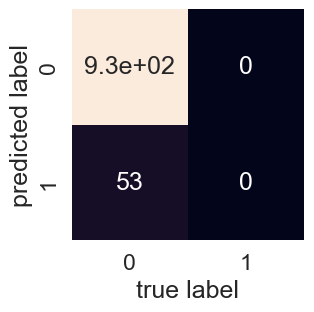

In [42]:
sns.set(font_scale=1.5) # Increase font size

def plot_conf_mat(y_test, y_preds):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test, y_preds)

## ROC Curve
* The ROC curve is the plot of the true positive rate against the false positive rate at each threshold setting.

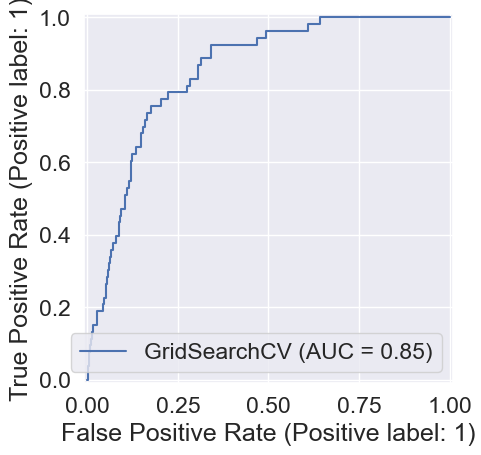

In [43]:
# RocCurveDisplay(gs_log_reg, X_test, y_test)
RocCurveDisplay.from_estimator(gs_log_reg, X_test, y_test);

## Classification Report 
* Generating cross-validated precision, recall and f1 score

In [44]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       929
           1       0.00      0.00      0.00        53

    accuracy                           0.95       982
   macro avg       0.47      0.50      0.49       982
weighted avg       0.89      0.95      0.92       982



D:\SOUMOJJAL SEN\Complete Machine Learning ZTM\Hands On\Classification Project 1\env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\SOUMOJJAL SEN\Complete Machine Learning ZTM\Hands On\Classification Project 1\env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\SOUMOJJAL SEN\Complete Machine Learning ZTM\Hands On\Classification Project 1\env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicte

## Recalculating the metrics using cross-validation

### Problem due to imbalanced dataset

Here we are facing the problem of imbalanced dataset. This is rectified using oversampling technique 

In SMOTE (Synthetic Minority Over-sampling Technique), creating synthetic samples means generating new, artificial data points that resemble existing ones in the minority class. Here’s how it works:

* Selecting Minority Samples: SMOTE first picks a data point from the minority class and then randomly selects one of its nearest neighbors within the same class.

* Interpolating New Samples: Instead of just duplicating these samples, SMOTE generates new points by creating combinations of the chosen data point and its neighbor. It interpolates values between the selected point and its neighbor, essentially placing new points somewhere along the line joining these two points.

* New Synthetic Sample: Each new synthetic sample thus "borrows" characteristics from both the original point and its neighbor, creating a sample that is similar but not identical to any existing sample in the minority class.

This process of generating synthetic samples helps balance the dataset by increasing the representation of the minority class without simple duplication, thereby reducing bias and improving the training of machine learning models.

In [45]:
smote = SMOTE()
# X_resampled, y_resampled
X_res, y_res = smote.fit_resample(X_train, y_train)

y_res.value_counts()

stroke
0    3771
1    3771
Name: count, dtype: int64

In [46]:
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid, # only difference
                          cv=5,
                          verbose=True)

gs_log_reg.fit(X_res, y_res);

gs_log_reg.best_params_

Fitting 5 folds for each of 30 candidates, totalling 150 fits


{'C': 0.7278953843983146, 'solver': 'liblinear'}

In [47]:
y_preds = gs_log_reg.predict(X_test)
y_preds

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,

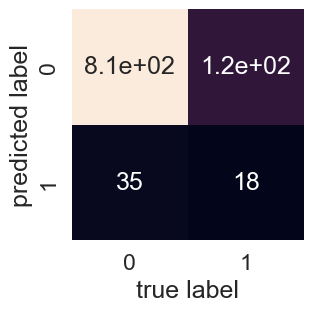

In [48]:
sns.set(font_scale=1.5) # Increase font size

def plot_conf_mat(y_test, y_preds):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test, y_preds)

In [49]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.96      0.87      0.91       929
           1       0.13      0.34      0.19        53

    accuracy                           0.84       982
   macro avg       0.54      0.61      0.55       982
weighted avg       0.91      0.84      0.87       982



In [50]:
best_params = gs_log_reg.best_params_
print(type(best_params))
best_params

<class 'dict'>


{'C': 0.7278953843983146, 'solver': 'liblinear'}

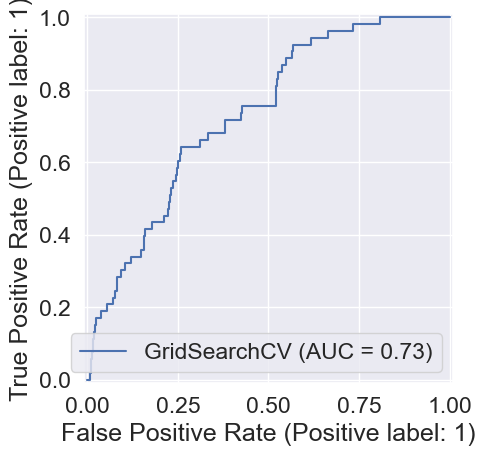

In [68]:
RocCurveDisplay.from_estimator(gs_log_reg, X_test, y_test);

In [51]:
# Creating new classifier with best parameters
clf = LogisticRegression(C=best_params['C'],
                        solver=best_params['solver'])

In [52]:
# Cross_validated precision

cv_acc = cross_val_score(clf,
                         X_res,
                         y_res,
                         cv=5,
                         scoring="accuracy")

print(cv_acc)
cv_acc = np.mean(cv_acc)
cv_acc

[0.83035123 0.90457256 0.88793103 0.89787798 0.88527851]


0.8812022647492587

In [53]:
# Cross_validated accuracy

cv_precision = cross_val_score(clf,
                         X_res,
                         y_res,
                         cv=5,
                         scoring="precision")

print(cv_precision)
cv_precision = np.mean(cv_precision)
cv_precision

[0.86725664 0.8776267  0.8660826  0.87593985 0.86086957]


0.8695550709785665

In [54]:
# Cross_validated recall

cv_recall = cross_val_score(clf,
                         X_res,
                         y_res,
                         cv=5,
                         scoring="recall")

print(cv_recall)
cv_recall = np.mean(cv_recall)
cv_recall

[0.77984085 0.94039735 0.91777188 0.9270557  0.91909814]


0.8968327858485429

In [55]:
# Cross_validated recall

cv_f1 = cross_val_score(clf,
                     X_res,
                     y_res,
                     cv=5,
                     scoring="f1")

print(cv_f1)
cv_f1 = np.mean(cv_f1)
cv_f1

[0.82122905 0.90792839 0.89117836 0.9007732  0.88903143]


0.8820280859524836

In [56]:
# Visualize cross—validated metrics
cv_metrics = pd.DataFrame({
    "Accuracy": cv_acc,
    "Precision ": cv_precision,
    "Recall ": cv_recall,
    "F1" : cv_f1},
    index=[0]
 )

cv_metrics

,Accuracy,Precision,Recall,F1
0,0.881202,0.869555,0.896833,0.882028


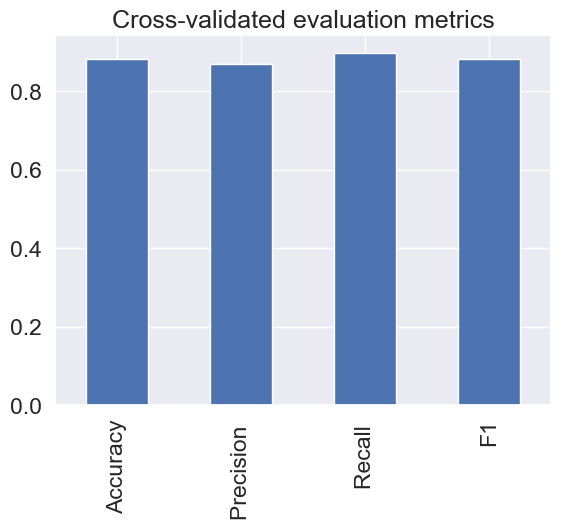

In [57]:
cv_metrics.T.plot.bar(
    title="Cross-validated evaluation metrics",
    legend=False
);

In [58]:
transformed_data.head()
print(len(transformed_data.dtypes))
transformed_data.dtypes

17


age                               float64
hypertension                        int64
heart_disease                       int64
avg_glucose_level                 float64
bmi                               float64
stroke                              int64
gender_Male                          bool
gender_Other                         bool
ever_married_Yes                     bool
work_type_Never_worked               bool
work_type_Private                    bool
work_type_Self-employed              bool
work_type_children                   bool
Residence_type_Urban                 bool
smoking_status_formerly smoked       bool
smoking_status_never smoked          bool
smoking_status_smokes                bool
dtype: object

In [59]:
clf = LogisticRegression(C=best_params['C'],
                        solver=best_params['solver'])

clf.fit(X_res, y_res)

LogisticRegression(C=0.7278953843983146, solver='liblinear')

Check coef_

Purpose: In linear models (like Linear Regression or Logistic Regression), clf.coef_ represents the coefficients assigned to each feature in the model, indicating their importance or influence in predicting the target variable.

Values: The values in clf.coef_ correspond to the weights learned by the model during training

In [60]:
clf.coef_

array([[ 0.07099427, -0.80294052, -1.29957606,  0.00434608, -0.02528493,
         0.85228699, -0.01234886,  1.50254417, -0.04794514,  2.14322995,
         1.46573178,  3.41970412,  1.12850116,  2.58440626,  2.58609266,
         2.83005202]])

In [61]:
print(transformed_data.columns)
print(len(transformed_data.columns))
print(len(clf.coef_[0]))

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke', 'gender_Male', 'gender_Other', 'ever_married_Yes',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Urban',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'smoking_status_smokes'],
      dtype='object')
17
16


In [62]:
features = transformed_data.drop(columns=['stroke']).columns
feature_dict = dict(zip(features, list(clf.coef_[0])))

feature_dict

{'age': 0.0709942655343759,
 'hypertension': -0.8029405183542822,
 'heart_disease': -1.2995760601302848,
 'avg_glucose_level': 0.0043460818542831285,
 'bmi': -0.02528493429520643,
 'gender_Male': 0.8522869885779235,
 'gender_Other': -0.012348858926819768,
 'ever_married_Yes': 1.5025441746976531,
 'work_type_Never_worked': -0.04794514225682464,
 'work_type_Private': 2.1432299494227376,
 'work_type_Self-employed': 1.465731776020424,
 'work_type_children': 3.4197041218118396,
 'Residence_type_Urban': 1.1285011610922204,
 'smoking_status_formerly smoked': 2.5844062601958058,
 'smoking_status_never smoked': 2.586092661788014,
 'smoking_status_smokes': 2.8300520212687963}

In [63]:
len(feature_dict)

16

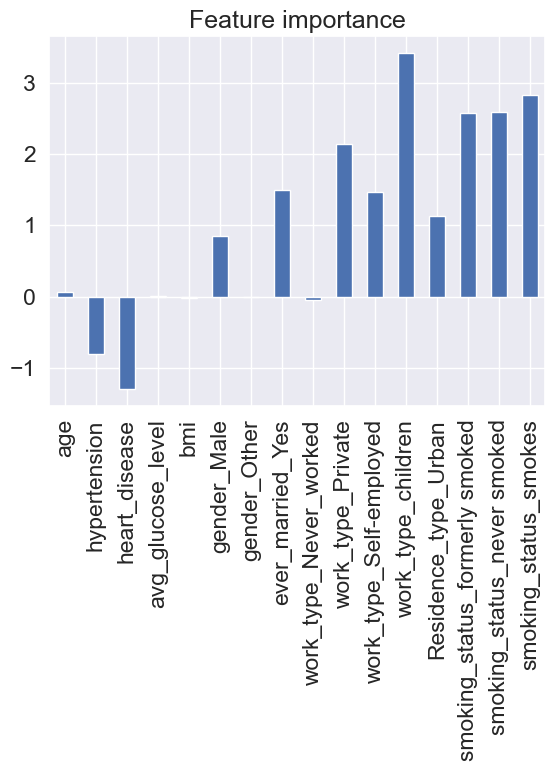

In [64]:
# Visualing feature importance

# Performing model-driven EDA

# Converting to DataFrame
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature importance", legend=False);

In [65]:
pd.crosstab(transformed_data['work_type_children'], transformed_data['stroke'])

stroke,0,1
work_type_children,,
False,4030,208
True,670,1


In [66]:
pd.crosstab(transformed_data['heart_disease'], transformed_data['stroke'])

stroke,0,1
heart_disease,,
0,4497,169
1,203,40


In [67]:
pd.crosstab(transformed_data['gender_Male'], transformed_data['stroke'])

stroke,0,1
gender_Male,,
False,2778,120
True,1922,89
